In [14]:
import pandas as pd
import numpy as np
import seaborn as sns

In [15]:
ad = pd.read_csv("advertising.csv")
df = ad.copy()
df = df.select_dtypes(include = ['float64','int64'])
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


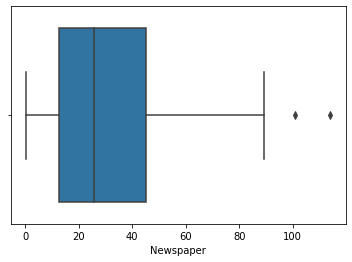

In [16]:
df_table = df["Newspaper"].copy()
sns.boxplot(x = df_table)

In [18]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

print("lower bound is " + str(lower_bound))
print("upper bound is " + str(upper_bound))
print(Q1)
print(Q3)

lower bound is -35.775000000000006
upper bound is 93.625
12.750000000000002
45.1


In [19]:
(df_table < (lower_bound)) | (df_table > (upper_bound))

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: Newspaper, Length: 200, dtype: bool

In [21]:
outliers_vector = (df_table < (lower_bound)) | (df_table > (upper_bound))
outliers_vector

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Name: Newspaper, Length: 200, dtype: bool

In [22]:
outliers = df_table[outliers_vector]

In [23]:
outliers.index

Int64Index([16, 101], dtype='int64')

In [24]:
df_table.shape

(200,)

In [25]:
clean_df_table = df_table[~((df_table < (lower_bound)) | (df_table > (upper_bound)))]

In [26]:
clean_df_table.shape

(198,)

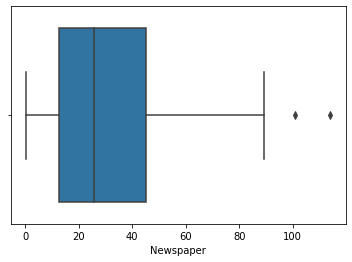

In [27]:
df_table = df["Newspaper"].copy()
sns.boxplot(x = df_table)

In [29]:
df_table.mean()

30.553999999999995

In [30]:
df_table.describe()

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: Newspaper, dtype: float64

In [31]:
df_table[outliers_vector] = df_table.mean()

In [32]:
df_table[outliers_vector].head()

16     30.554
101    30.554
Name: Newspaper, dtype: float64

In [33]:
df_table.describe()

count    200.000000
mean      29.785040
std       20.343446
min        0.300000
25%       12.750000
50%       25.750000
75%       43.550000
max       89.400000
Name: Newspaper, dtype: float64

In [34]:
outliers_lower_vector = (df_table < (lower_bound))
outliers_upper_vector = (df_table > (upper_bound))

In [35]:
df_table[outliers_lower_vector] = lower_bound
df_table[outliers_upper_vector] = upper_bound

In [36]:
df_table.max()

89.4

In [37]:
df_table.min()

0.3